# Historical Wildfire Analysis
***


## Background
Wildfires can happen anywhere in the United States, but the most common places are in the Western United States and Florida. The areas are usually under drought conditions. Lightning strikes are the reason for most natural wildfires and are the reason for some of the most famous wildfires. Human activity is another cause of wildfires, including forestry experts, campers, or arsonists. 


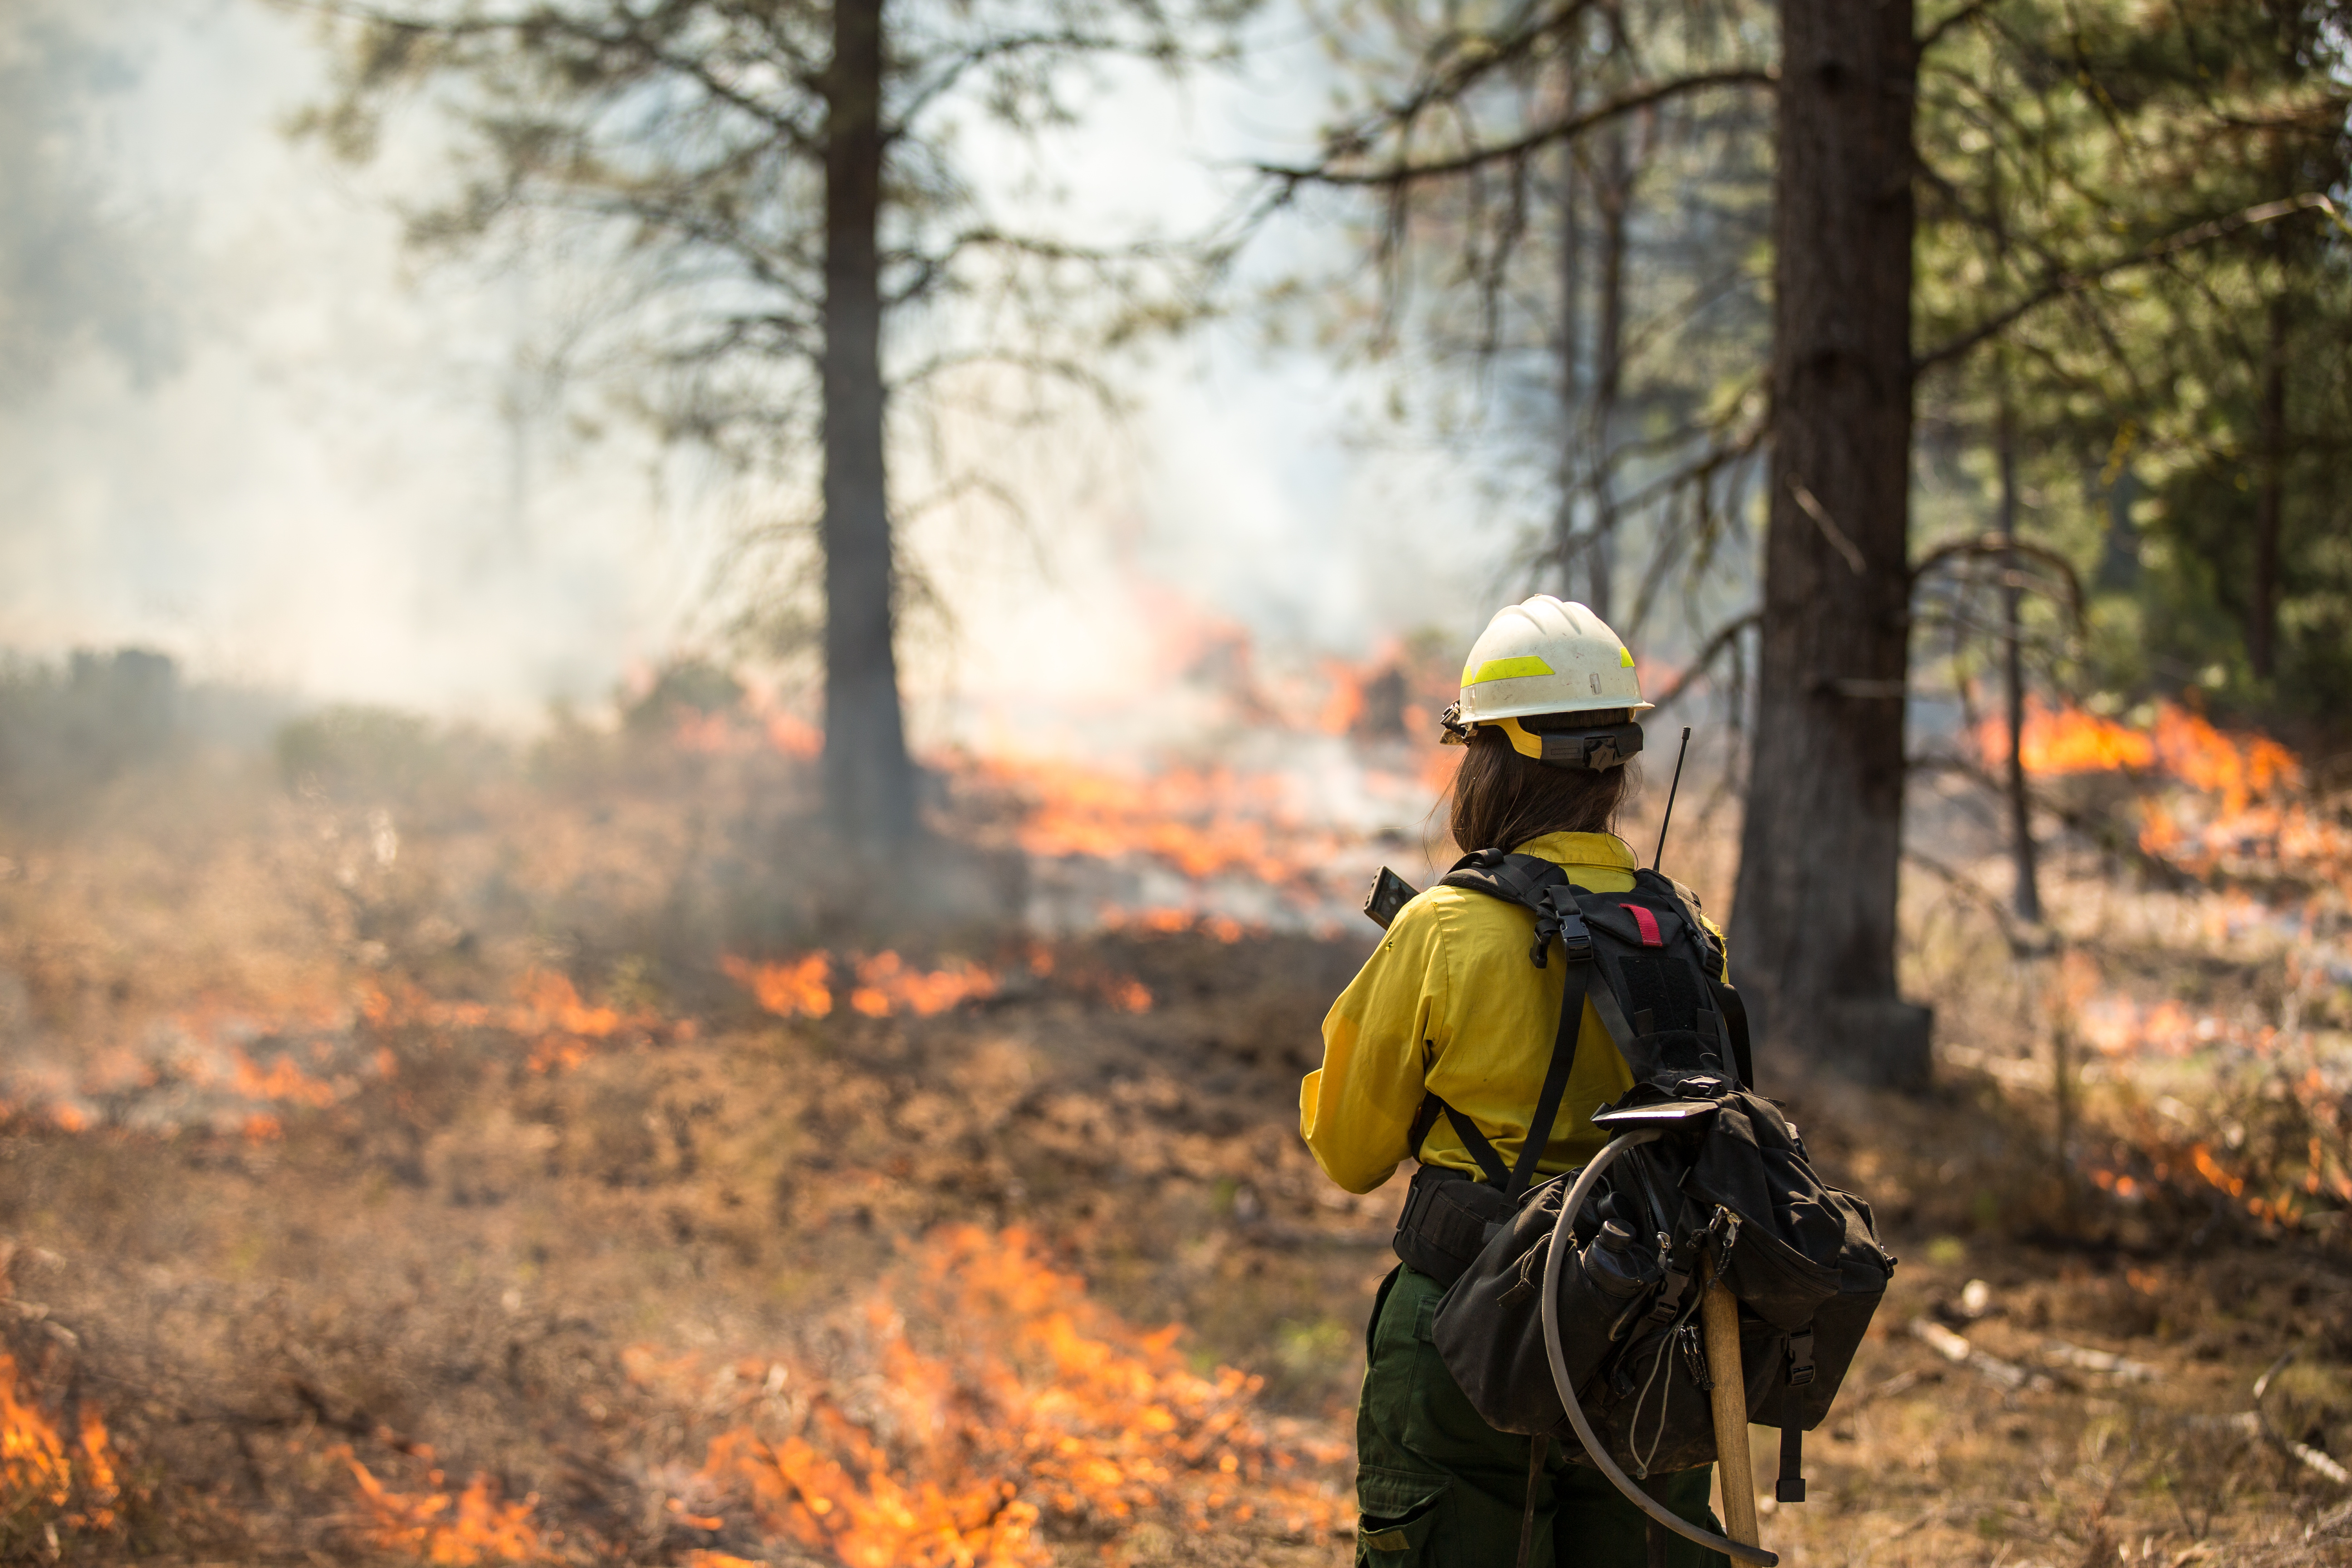


## Data
- Wildfires that occurred in the United States from 1992 to 2015.  
- 1.88 million geo-referenced wildfire records.  
- 140 million acres burned during the 24-year period.  

## Analysis Purpose

The purpose of this analysis is to understand the trends of wildfires better by answering the following questions:

1. Are wildfires in the United States increasing over time?  
2. What are the causes of the wildfires in the United States?  
3. Where are the fire hot spots in the United States?  



## Analysis Tools

- [ArcGIS Spatial Analyst](https://pro.arcgis.com/en/pro-app/latest/help/analysis/spatial-analyst/basics/what-is-the-spatial-analyst-extension.htm)
- [pandas](https://pandas.pydata.org/)
- [Matplotlib](https://matplotlib.org/)
- [NumPy](https://numpy.org/)
***


In [9]:
import arcpy
import matplotlib
import pandas as pd
import numpy as np

# Import ArcGIS API for Python
import arcgis
from arcgis.features import GeoAccessor, GeoSeriesAccessor

In [2]:
wildfires = r'C:\EsriTraining\PYTS\Projects\WildfireAnalysis\FPA_FOD_20170508.gdb\Fires'

## Verify Data
Get information about the table fields using pandas .info(), and return the first 5 rows of the data using pandas .head(). 

In [3]:
wildfires_df = pd.DataFrame.spatial.from_featureclass(wildfires)

In [4]:
df = wildfires_df[['FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'STAT_CAUSE_DESCR', 'FIRE_SIZE', 'STATE', 'FIPS_CODE', 'FIPS_NAME', 'SHAPE']]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880465 entries, 0 to 1880464
Data columns (total 9 columns):
 #   Column            Dtype         
---  ------            -----         
 0   FIRE_YEAR         int64         
 1   DISCOVERY_DATE    datetime64[ns]
 2   DISCOVERY_DOY     int64         
 3   STAT_CAUSE_DESCR  object        
 4   FIRE_SIZE         float64       
 5   STATE             object        
 6   FIPS_CODE         object        
 7   FIPS_NAME         object        
 8   SHAPE             geometry      
dtypes: datetime64[ns](1), float64(1), geometry(1), int64(2), object(4)
memory usage: 129.1+ MB


In [6]:
df.head(5)

FIRE_YEAR  ...                                              SHAPE
0       2005  ...  {"x": -121.00583333000003, "y": 40.03694443999...
1       2004  ...  {"x": -120.40444444000002, "y": 38.93305556000...
2       2004  ...  {"x": -120.73555555999997, "y": 38.98416666999...
3       2004  ...  {"x": -119.91333333, "y": 38.55916666999997, "...
4       2004  ...  {"x": -119.93305555999996, "y": 38.55916666999...

[5 rows x 9 columns]

## Explore Data Analysis
Summarize fires by year and plot them on a bar graph.

In [7]:
df[['FIRE_YEAR']].groupby('FIRE_YEAR').agg({'FIRE_YEAR':'count'})

FIRE_YEAR
FIRE_YEAR           
1992           67975
1993           61989
1994           75955
1995           71472
1996           75574
1997           61450
1998           68370
1999           89363
2000           96416
2001           86587
2002           75656
2003           68261
2004           69279
2005           88604
2006          114004
2007           95573
2008           85378
2009           78325
2010           79889
2011           90552
2012           72769
2013           64780
2014           67753
2015           74491

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('ggplot')
sorted_df = df.sort_values('FIRE_YEAR')
fire_freq = sorted_df.groupby('FIRE_YEAR').count()
x = np.asarray(fire_freq.axes[0])
y = np.asarray(df.groupby('FIRE_YEAR').size())

### Are wildfires in the United States increasing over time?

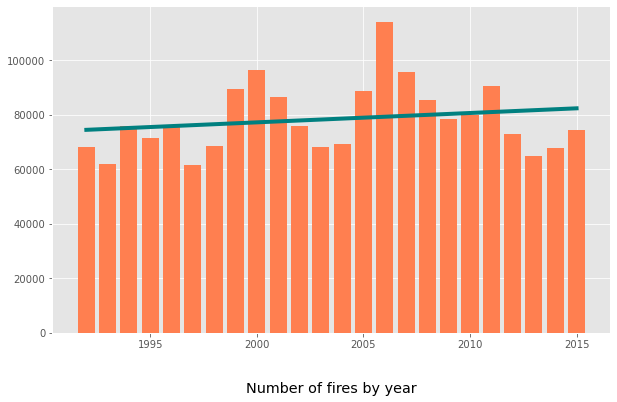

In [14]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x, y, color='coral')
plt.title('Number of fires by year', y=-0.2)
fit1 = np.polyfit(x, y, deg=1)
ax.plot(x, x*fit1[0] + fit1[1], color='teal', linewidth=4);
plt.show()

### What are the causes of the wildfires in the United States? 

In [15]:
distribution = df['STAT_CAUSE_DESCR'].value_counts()

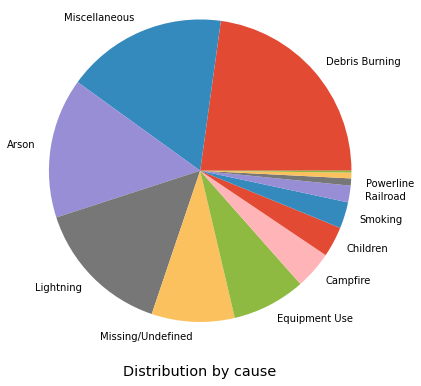

In [16]:
plt.figure(figsize=(6,6))
plt.title('Distribution by cause', y=-0.15)
plt.pie(distribution, labels=list(distribution.index[:-2]) + ['', '']);
plt.axis('equal');
plt.show()

In [17]:
pd.options.mode.chained_assignment = None 

df['MONTH'] = pd.DatetimeIndex(df['DISCOVERY_DATE']).month
df['DAY_OF_WEEK'] = df['DISCOVERY_DATE'].dt.dayofweek
df_arson = df[df['STAT_CAUSE_DESCR']=='Arson']
dfa = df_arson['DAY_OF_WEEK'].value_counts()
df_lightning = df[df['STAT_CAUSE_DESCR']=='Lightning']
dfl = df_lightning['DAY_OF_WEEK'].value_counts()

In [20]:
ind = np.arange(7) 
width = 0.35       

fig, ax   = plt.subplots(figsize=(10,6))
arson     = ax.bar(ind, dfa.sort_index(), width, color='coral')
lightning = ax.bar(ind + width, dfl.sort_index(), width, color='teal')

ax.set_title('Wildfires by day of week', y=-0.15)
ax.set_xticklabels(('', 'Mon', 'Tues', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'))
ax.legend((arson[0], lightning[0]), ('Arson', 'Lightning'), loc=2);

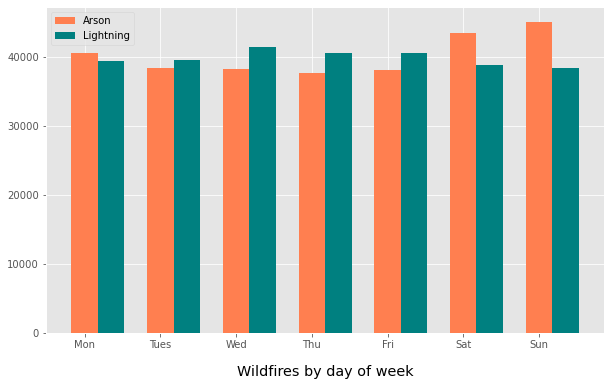

In [21]:
plt.show()

### Where are the fire hot spots in the United States?

In [28]:
fire_density = arcpy.sa.PointDensity("Fires", "NONE", 0.72, "Circle 6 MAP", "SQUARE_MAP_UNITS");
fire_density.save(r"C:\EsriTraining\PYTS\Projects\WildfireAnalysis\WildfireAnalysis.gdb\FireDensity")

***

## Citations

This analysis is adapted from the [ArcGIS Developers Historical Wildfire Analysis Sample Notebook](https://developers.arcgis.com/python/sample-notebooks/historical-wildfire-analysis).  

Short, Karen C. 2017. Spatial wildfire occurrence data for the United States, 1992-2015 [FPA_FOD_20170508]. 4th Edition. Fort Collins, CO: Forest Service Research Data Archive. https://doi.org/10.2737/RDS-2013-0009.4